In [319]:
#Importing the Dependencies
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Data Collection and Processing 

In [286]:
#Loading the dataset and print
df = pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


This dataset shows a particular loan ID, Gender(Male or female), Married status,Dependents(their sons and daughter),Education,Self Employed,Income,Coapplicant Income,Loan amount,Loan Amount Term,Credit History(1 or 0, 1 means very good credit history),Property Area(Urban and Rural),Loan status(Approved or not Approved)

Our target column is Loan Status.It has only two values Y or No, this is Classification problem.


In [287]:
#No of Rows and Columns
df.shape

(614, 13)

In this dataset 614 Rows and 13 Columns.

In [288]:
#Statistical measures
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Mean is greater than median in ApplicantIncome,CoapplicantIncome and LoanAmount.
There is much difference in 75th percentile and max.
Std is more in ApplicantIncome and CoapplicantIncome.

In [289]:
#No. of missing values in each column
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In many columns missing values are there.

In this data set maximum values are categorical so we can not do imputation (missing value replace by mean,mode and median).Simply we will drop all missing values.

In [290]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [291]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())

In [292]:
#Check Skewness
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.882361
dtype: float64

In [293]:
#Remove the Skewness
from scipy.stats import boxcox
df['ApplicantIncome'] =boxcox(df['ApplicantIncome'],0)

In [294]:
df.skew()

ApplicantIncome      0.479580
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -1.882361
dtype: float64

In [295]:
df['Loan_Amount_Term'] =boxcox(df['Loan_Amount_Term'],0)

In [296]:
df['LoanAmount'] =boxcox(df['LoanAmount'],0)

In [297]:
df.skew()

ApplicantIncome      0.479580
CoapplicantIncome    7.491531
LoanAmount          -0.223227
Loan_Amount_Term    -4.868293
Credit_History      -1.882361
dtype: float64

Too much skewness present in this dataset.

In [298]:
# Dropping the missing values
df = df.dropna()

In [299]:
#Again check the missing values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [300]:
#Label Encoding
df.replace({'Loan_Status':{'N':0,'Y':1}},inplace=True)

In [301]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674026,0.0,4.986426,5.886104,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,8.430109,1508.0,4.852030,5.886104,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.0,4.189655,5.886104,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,2358.0,4.787492,5.886104,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,8.699515,0.0,4.948760,5.886104,1.0,Urban,1


In [302]:
df.shape

(511, 13)

In [303]:
# Dependent column values
df['Dependents'].value_counts()

0     294
2      88
1      85
3+     44
Name: Dependents, dtype: int64

0 means no dependent is 0,
2 means no of dependent is 2,
1 means no of dependent is 1,
3+ means no of dependent are more than 3.

In [304]:
#Replacing the value of 3+ to 4
df = df.replace(to_replace='3+',value=4)

In [305]:
df['Dependents'].value_counts()

0    294
2     88
1     85
4     44
Name: Dependents, dtype: int64

# Data Visualization

<AxesSubplot:xlabel='Education', ylabel='count'>

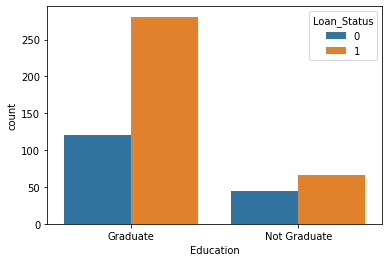

In [306]:
#Education and loan status
sns.countplot(x='Education',hue='Loan_Status',data=df)

For graduate approved loan is greater, For not graduate approved loan is greater as well.

<AxesSubplot:xlabel='Married', ylabel='count'>

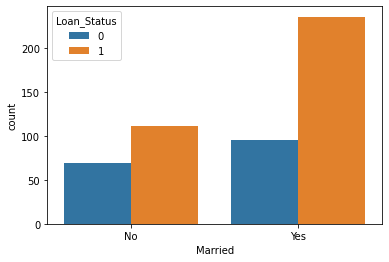

In [307]:
#Marital status and loan status
sns.countplot(x='Married',hue='Loan_Status',data=df)

For married Approved loan is more than 200,for unmarried approved loan is more than 100.

<AxesSubplot:xlabel='Gender', ylabel='count'>

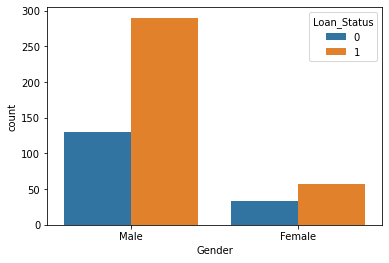

In [308]:
#Gender and loan status
sns.countplot(x='Gender',hue='Loan_Status',data=df)

Approved loan is greater than Female approved loan count.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

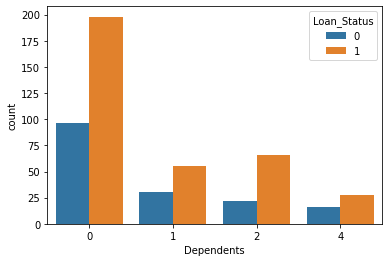

In [309]:
#Dependents and loan status
sns.countplot(x='Dependents',hue='Loan_Status',data=df)

Loan approved counts are more for zero dependent.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

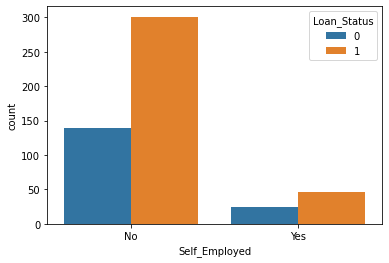

In [310]:
#Self_Employed and loan status
sns.countplot(x='Self_Employed',hue='Loan_Status',data=df)

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

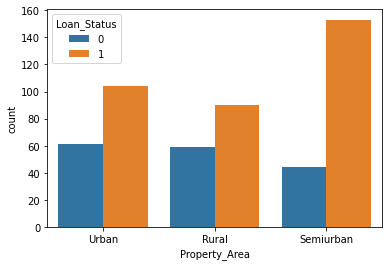

In [311]:
#Property_Area and loan status
sns.countplot(x='Property_Area',hue='Loan_Status',data=df)

Approved loan count is more in semiurban area.

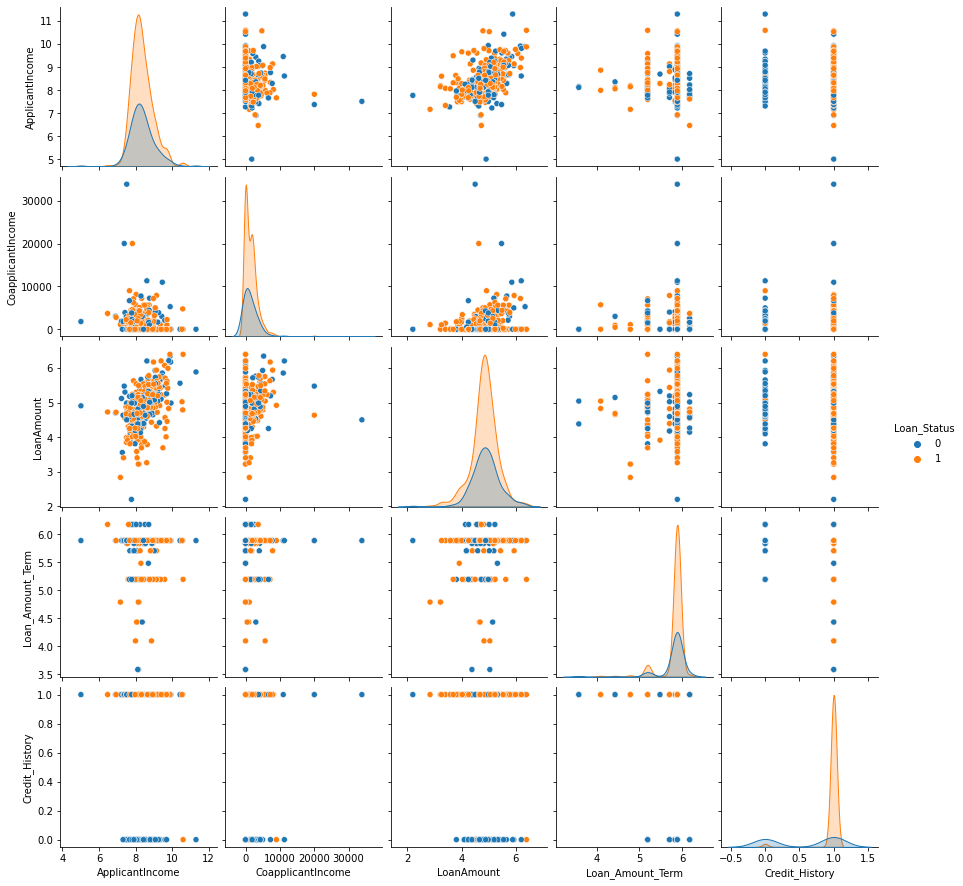

In [312]:
sns.pairplot(df,hue='Loan_Status')

ApplicantIncome         AxesSubplot(0.125,0.536818;0.110714x0.343182)
CoapplicantIncome    AxesSubplot(0.257857,0.536818;0.110714x0.343182)
LoanAmount           AxesSubplot(0.390714,0.536818;0.110714x0.343182)
Loan_Amount_Term     AxesSubplot(0.523571,0.536818;0.110714x0.343182)
Credit_History       AxesSubplot(0.656429,0.536818;0.110714x0.343182)
Loan_Status          AxesSubplot(0.789286,0.536818;0.110714x0.343182)
dtype: object

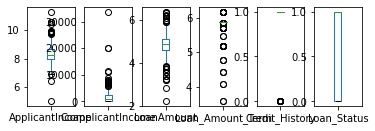

In [313]:
df.plot(kind='box',subplots=True,layout=(2,6))

In [314]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674026,0.0,4.986426,5.886104,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,8.430109,1508.0,4.852030,5.886104,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.0,4.189655,5.886104,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,2358.0,4.787492,5.886104,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,8.699515,0.0,4.948760,5.886104,1.0,Urban,1


In [315]:
#Convert categorical columns to numericals values
df.replace({'Married':{'No':0,'Yes':1},
                'Gender':{'Male':1,'Female':0},
                'Self_Employed':{'No':0,'Yes':1},
                'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
                'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [316]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,8.674026,0.0,4.986426,5.886104,1.0,2,1
1,LP001003,1,1,1,1,0,8.430109,1508.0,4.852030,5.886104,1.0,0,0
2,LP001005,1,1,0,1,1,8.006368,0.0,4.189655,5.886104,1.0,2,1
3,LP001006,1,1,0,0,0,7.856707,2358.0,4.787492,5.886104,1.0,2,1
4,LP001008,1,0,0,1,0,8.699515,0.0,4.948760,5.886104,1.0,2,1


We do not need Loan_ID so we can drop it.

In [317]:
x = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y =df['Loan_Status']

In [323]:
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=i)
    lm= DecisionTreeClassifier()
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRs=i
print('Best accuracy is ',maxAccu, 'on random_state',maxRs)

Best accuracy is  0.7988165680473372 on random_state 80


In [270]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,1,0,8.674026,0.0,4.986426,5.886104,1.0,2
1,1,1,1,1,0,8.430109,1508.0,4.852030,5.886104,1.0,0
2,1,1,0,1,1,8.006368,0.0,4.189655,5.886104,1.0,2
3,1,1,0,0,0,7.856707,2358.0,4.787492,5.886104,1.0,2
4,1,0,0,1,0,8.699515,0.0,4.948760,5.886104,1.0,2


In [271]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [324]:
#Split the data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=80)

In [325]:
print(x.shape,x_train.shape,x_test.shape)

(511, 11) (357, 11) (154, 11)


# Training the model

In [339]:
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [334]:
#Decision Tree Classifier Model
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred = dtc.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.52      0.63      0.57        46
           1       0.83      0.75      0.79       108

    accuracy                           0.71       154
   macro avg       0.67      0.69      0.68       154
weighted avg       0.73      0.71      0.72       154



In [335]:
#Random Forest Classifier model
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
pred = rfc.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.69      0.52      0.59        46
           1       0.82      0.90      0.85       108

    accuracy                           0.79       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.78      0.79      0.78       154



In [326]:
#Support Vector Machine Model
SVM = svm.SVC(kernel='linear')

In [327]:
#Training the SVM
SVM.fit(x_train,y_train)

SVC(kernel='linear')

In [338]:
#Accuracy score on training data
x_train_prediction = SVM.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction,y_train)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.69      0.52      0.59        46
           1       0.82      0.90      0.85       108

    accuracy                           0.79       154
   macro avg       0.75      0.71      0.72       154
weighted avg       0.78      0.79      0.78       154



In [337]:

print('Accuracy on training data:',training_data_accuracy)

Accuracy on training data: 0.7955182072829131


In [340]:
#KNeighborsClassifier model
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)
pred = knn.predict(x_test)
acc=classification_report(y_test,pred)
print(acc)

              precision    recall  f1-score   support

           0       0.36      0.20      0.25        46
           1       0.71      0.85      0.78       108

    accuracy                           0.66       154
   macro avg       0.54      0.52      0.51       154
weighted avg       0.61      0.66      0.62       154



In [341]:
from sklearn.model_selection import cross_val_score

In [342]:
#Cross val score of dtc
print(cross_val_score(dtc,x,y,cv=5).mean())

0.7299447934513612


In [343]:
#cross val score of rfc
print(cross_val_score(rfc,x,y,cv=5).mean())

0.7984199505044736


In [345]:
#cross val score of SVM
print(cross_val_score(SVM,x,y,cv=5).mean())

0.8081667618503712


In [346]:
#cross val score of knn
print(cross_val_score(knn,x,y,cv=5).mean())

0.6477251094612603


least difference of cross val and accuracy in Random Forest Classifier.
so our best model is Random Forest Classifier.

# Hyper parameter tuning

In [347]:
from sklearn.model_selection import GridSearchCV

In [355]:
#finding best parameter for rfc
parameter ={'max_depth':np.arange(2,10),
           'criterion':['gini','entropy'],
           'max_leaf_nodes':np.arange(2,10),
           'max_features':['auto','sqrt','log2']}

In [356]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=5)

In [357]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [359]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'log2',
 'max_leaf_nodes': 7}

In [360]:
#Final_mod
Final_mod = RandomForestClassifier(criterion='gini',max_depth=6,max_features='log2',max_leaf_nodes=7)
Final_mod.fit(x_train,y_train)
pred= Final_mod.predict(x_test)
acc= accuracy_score(y_test,pred)
print(acc*100)

82.46753246753246


Performace of my model increased after using Hyper parameter tuning.

In [363]:
#Accuracy score on test data
x_test_prediction = rfc.predict(x_test)
test_data_accuracy = accuracy_score(x_test_prediction,y_test)

In [364]:
print('Accuracy on test data:',test_data_accuracy)

Accuracy on test data: 0.7857142857142857


Test data accuracy is good.

# AUC-ROC Curve

In [367]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [368]:
y_pred_prob=rfc.predict_proba(x_test)[:,1]

In [369]:
y_pred_prob

array([0.92, 0.9 , 0.54, 0.73, 0.86, 0.72, 0.76, 0.81, 0.42, 0.41, 0.71,
       0.78, 0.75, 0.67, 0.91, 0.63, 0.79, 0.92, 0.79, 0.95, 0.78, 0.87,
       0.75, 0.14, 0.64, 0.73, 0.4 , 0.63, 0.78, 0.91, 0.91, 0.72, 0.89,
       0.8 , 0.72, 0.13, 0.74, 0.88, 0.53, 0.05, 0.1 , 0.75, 0.72, 0.15,
       0.67, 0.7 , 0.9 , 0.96, 0.16, 0.9 , 1.  , 0.89, 0.8 , 0.93, 0.09,
       0.54, 0.88, 0.52, 0.22, 0.59, 0.14, 0.78, 0.64, 0.44, 0.89, 0.79,
       0.67, 0.46, 0.72, 0.87, 0.94, 0.1 , 0.05, 0.67, 0.85, 0.46, 0.65,
       0.6 , 0.42, 0.8 , 0.8 , 0.72, 0.72, 0.8 , 0.91, 0.22, 0.85, 0.8 ,
       0.84, 0.7 , 0.82, 0.12, 0.74, 0.12, 0.75, 0.92, 0.92, 0.92, 0.56,
       0.77, 0.97, 0.93, 0.15, 0.66, 0.4 , 0.88, 0.86, 0.51, 0.77, 0.13,
       0.85, 0.86, 0.84, 0.94, 0.99, 0.95, 0.24, 0.16, 0.44, 0.81, 0.86,
       0.97, 0.82, 0.05, 0.85, 0.87, 0.47, 0.72, 0.91, 0.09, 0.21, 0.29,
       0.53, 0.94, 0.93, 0.96, 0.73, 0.12, 0.51, 0.76, 0.54, 0.2 , 0.79,
       0.79, 0.88, 0.62, 0.5 , 0.79, 0.64, 0.86, 0.

In [370]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [371]:
fpr

array([0.        , 0.        , 0.02173913, 0.02173913, 0.02173913,
       0.02173913, 0.02173913, 0.04347826, 0.06521739, 0.06521739,
       0.08695652, 0.10869565, 0.13043478, 0.13043478, 0.13043478,
       0.15217391, 0.15217391, 0.19565217, 0.2173913 , 0.23913043,
       0.26086957, 0.26086957, 0.2826087 , 0.2826087 , 0.2826087 ,
       0.34782609, 0.36956522, 0.39130435, 0.39130435, 0.39130435,
       0.39130435, 0.41304348, 0.41304348, 0.43478261, 0.43478261,
       0.43478261, 0.43478261, 0.45652174, 0.47826087, 0.52173913,
       0.52173913, 0.52173913, 0.52173913, 0.56521739, 0.60869565,
       0.65217391, 0.67391304, 0.80434783, 0.86956522, 0.91304348,
       0.93478261, 1.        ])

In [372]:
tpr

array([0.        , 0.00925926, 0.00925926, 0.06481481, 0.11111111,
       0.13888889, 0.18518519, 0.23148148, 0.25      , 0.27777778,
       0.30555556, 0.32407407, 0.36111111, 0.39814815, 0.41666667,
       0.42592593, 0.44444444, 0.48148148, 0.52777778, 0.55555556,
       0.56481481, 0.58333333, 0.62037037, 0.63888889, 0.66666667,
       0.71296296, 0.71296296, 0.72222222, 0.75925926, 0.77777778,
       0.80555556, 0.81481481, 0.83333333, 0.83333333, 0.84259259,
       0.87037037, 0.88888889, 0.88888889, 0.89814815, 0.89814815,
       0.9537037 , 0.96296296, 0.98148148, 0.98148148, 0.98148148,
       0.98148148, 0.99074074, 0.99074074, 0.99074074, 0.99074074,
       1.        , 1.        ])

In [373]:
thresholds

array([2.  , 1.  , 0.99, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 , 0.89, 0.88,
       0.87, 0.86, 0.85, 0.84, 0.82, 0.81, 0.8 , 0.79, 0.78, 0.77, 0.76,
       0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.67, 0.65, 0.64, 0.63, 0.6 ,
       0.59, 0.56, 0.54, 0.53, 0.52, 0.51, 0.47, 0.42, 0.41, 0.4 , 0.24,
       0.22, 0.2 , 0.16, 0.13, 0.12, 0.1 , 0.09, 0.05])

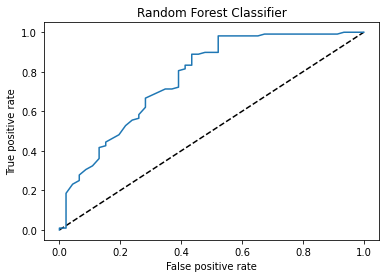

In [374]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.show()

In [375]:
auc_score=roc_auc_score(y_test,rfc.predict(x_test))

In [376]:
print(auc_score)

0.7099436392914653


# Saving the model

In [377]:
import joblib
joblib.dump(Final_mod,'Loan_Prediction.pkl')

['Loan_Prediction.pkl']

# Loading the model

In [379]:
loaded_model = joblib.load(open('Loan_Prediction.pkl','rb'))
result = loaded_model.score(x_test,y_test)
print(result)

0.8246753246753247
